<a href="https://colab.research.google.com/github/gyanasluitel/ML-LabPracticals/blob/main/CS_GyanasLuitel_Lab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 8: Deep Learning with Convolution Neural Networks

- Name: Gyanas Luitel
- Roll No: 27
- Group: Computer Science

## Imports

In [1]:
import numpy as np
np.random.seed(42)

import matplotlib.pyplot as plt


In [2]:
# importing tensorflow
%tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [3]:
tf.__version__

'1.15.2'

In [2]:
import keras

from keras.models import Sequential, Model
from keras.datasets import mnist, cifar10

from keras.optimizers import Adadelta

from keras.layers import (Dense, Dropout, Activation, Convolution2D,
                          MaxPooling2D, Flatten)

from keras.utils import np_utils

from keras.preprocessing import sequence
from keras import backend as K
from IPython.display import SVG, display

import matplotlib.image as mpimg
from keras.callbacks import EarlyStopping

## Chapter 16 - Artificial Intelligence with Python

## Building a perceptron-based linear regressor

In [5]:
# Define the number of points to generate
num_points = 1200

In [6]:
# Generate the data based on equation y = mx + c
data = []
m = 0.2
c = 0.5

for i in range(num_points):
  # Generate 'x'
  x = np.random.normal(0.0, 0.8)
  # Generate some noise
  noise = np.random.normal(0.0, 0.04)
  #Compute 'y'
  y = m * x + c + noise

  data.append([x, y])

In [7]:
# Separate x and y
x_data = [d[0] for d in data]
y_data = [d[1] for d in data]

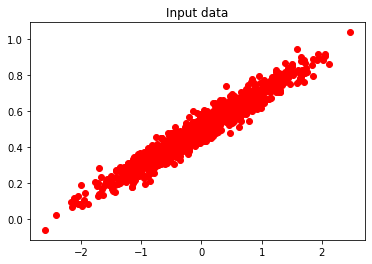

In [8]:
# Plot the generated data
plt.plot(x_data, y_data, 'ro')
plt.title('Input data')
plt.show()

In [9]:
# Generate weights and biases for perceptron
# - using random number generator for weights
# - setting biases to zero
W = tf.Variable(tf.random.uniform([1], -1.0, 1.0))
b = tf.Variable(tf.zeros([1]))

In [10]:
# Define equation for 'y' using Tensorflow variables
y = W * x_data + b

In [11]:
# Define how to compute the loss (can be used during the training process)
# Optimizer will try to minimze this value as much as possible
loss = tf.reduce_mean(tf.square(y - y_data))

In [12]:
# Define the gradient descent optimizer and specify the loss function
optimizer = tf.compat.v1.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [13]:
# Initialize all the variables
init = tf.initialize_all_variables()

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [14]:
# Start the tensorflow session and run it
sess = tf.Session()
sess.run(init)


ITERATION 1
W = -0.10299358
b = 0.5085804
loss = 0.057072964


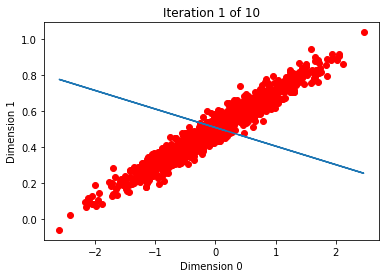


ITERATION 2
W = 0.079958886
b = 0.5046342
loss = 0.010313065


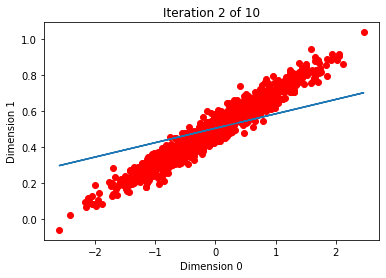


ITERATION 3
W = 0.15247333
b = 0.5031063
loss = 0.0029673004


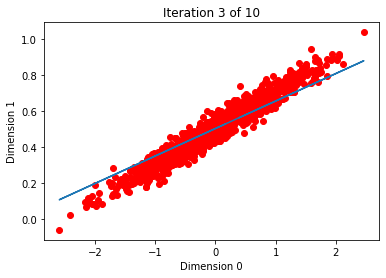


ITERATION 4
W = 0.18121463
b = 0.5025007
loss = 0.0018133142


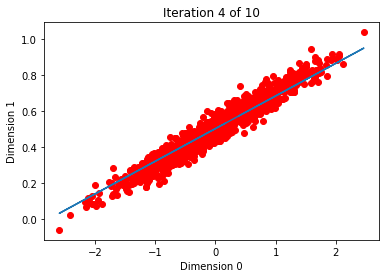


ITERATION 5
W = 0.19260632
b = 0.5022607
loss = 0.0016320283


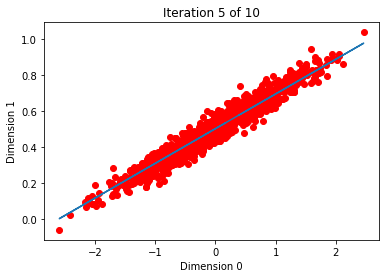


ITERATION 6
W = 0.19712144
b = 0.50216556
loss = 0.001603549


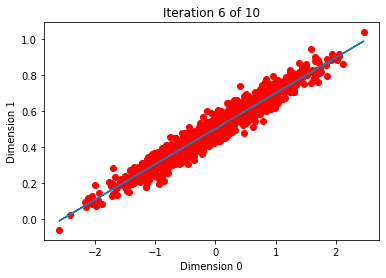


ITERATION 7
W = 0.19891103
b = 0.5021278
loss = 0.001599075


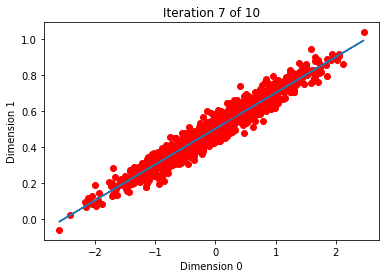


ITERATION 8
W = 0.19962034
b = 0.50211287
loss = 0.0015983721


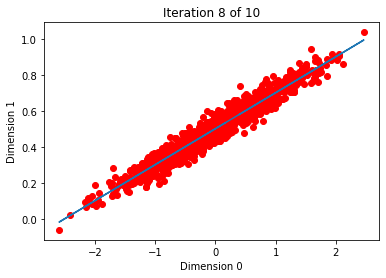


ITERATION 9
W = 0.19990148
b = 0.50210696
loss = 0.0015982618


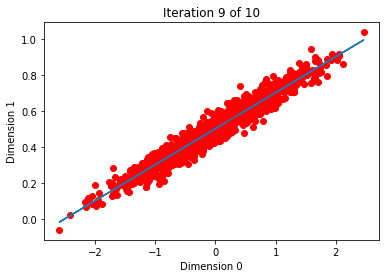


ITERATION 10
W = 0.2000129
b = 0.5021046
loss = 0.0015982443


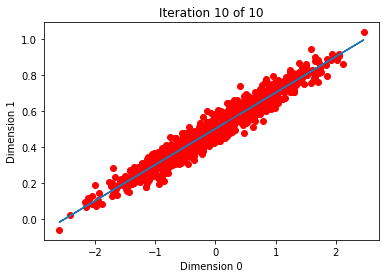

In [15]:
# Start iterating
num_iterations = 10
for step in range(num_iterations):
  # Run the session
  sess.run(train)
  # Print the progress
  print('\nITERATION', step + 1)
  print('W =', sess.run(W)[0])
  print('b =', sess.run(b)[0])
  print('loss =', sess.run(loss))

  # Plot the input data
  plt.plot(x_data, y_data, 'ro')

  # Plot the predicted output line
  plt.plot(x_data, sess.run(W) * x_data + sess.run(b))

  # Set plotting parameters
  plt.xlabel('Dimension 0')
  plt.ylabel('Dimension 1')
  plt.title('Iteration ' + str(step+1) + ' of ' + str(num_iterations))
  plt.show()


## Building an image classifier using a single layer neural network

In [16]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("./mnist_data", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/datas

In [17]:
# The images are 28x28, so create the input layer
# with 784 neurons (28x28=784)
x = tf.placeholder(tf.float32, [None, 784])

In [18]:
# Create a layer with weights and biases. There are 10 distinct
# digits, so the output layer should have 10 classes
W = tf.Variable(tf.zeros([784, 10]))
b= tf.Variable(tf.zeros([10]))

In [19]:
# Create the equation for 'y' using y = W * x + b
y = tf.matmul(x, W) + b

In [20]:
# Define the entropy loss and the gradient descent optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_loss, 
                                                              logits=y))
optimizer = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.



In [21]:
# Initialize all the variables
init = tf.initialize_all_variables()

In [22]:
# Create a session
session = tf.Session()
session.run(init)

In [23]:
# Start training
num_iterations = 1200
batch_size = 90

for _ in range(num_iterations):
  # Get the next batch of images
  x_batch, y_batch = mnist.train.next_batch(batch_size)
  # Train on this batch of images
  session.run(optimizer, feed_dict = {x: x_batch, y_loss: y_batch})

In [24]:
# Compute the accuracy using test data
predicted = tf.equal(tf.argmax(y, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))
print('\nAccuracy =', session.run(accuracy, feed_dict = {
    x: mnist.test.images,
    y_loss: mnist.test.labels
}))


Accuracy = 0.9191


## Building an image classifier using a Convolution Neural Network

In [25]:
# Define a function to create values for weights in each layer
def get_weights(shape):
  data = tf.truncated_normal(shape, stddev=0.1)
  return tf.Variable(data)

In [26]:
# Define a function to create values for biases in each layer
def get_biases(shape):
  data = tf.constant(0.1, shape=shape)
  return tf.Variable(data)

In [27]:
# Define a function to create a layer based on the input shape
def create_layer(shape):
  # Get  the weights and biases
  W = get_weights(shape)
  b = get_biases([shape[-1]])

  return W, b

In [28]:
# Define a function to perform 2D-convolution
def convolution_2d(x, W):
  return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1],
                      padding='SAME')

In [29]:
# Define a function to perform a 2*2 max pooling operation
def max_pooling(x):
  return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                        strides=[1, 2, 2, 1], padding='SAME')

In [30]:
# Get the MNIST data
mnist = input_data.read_data_sets("./mnist_data", one_hot=True)

Extracting ./mnist_data/train-images-idx3-ubyte.gz
Extracting ./mnist_data/train-labels-idx1-ubyte.gz
Extracting ./mnist_data/t10k-images-idx3-ubyte.gz
Extracting ./mnist_data/t10k-labels-idx1-ubyte.gz


In [31]:
# The images are 28*28, so create the input layer with 784 neurons(28*28=784)
x = tf.placeholder(tf.float32, [None, 784])

In [32]:
# Reshape 'x' into a 4D tensor
x_image = tf.reshape(x, [-1, 28, 28, 1])

In [33]:
# Define the first convolutional layer
W_conv1, b_conv1 = create_layer([5, 5, 1, 32])

In [34]:
# Convolve the image with weight tensor, 
# add the bias and then apply the ReLU function
h_conv1 = tf.nn.relu(convolution_2d(x_image, W_conv1) + b_conv1)

# Apply the max pooling operator
h_pool1 = max_pooling(h_conv1)

In [35]:
# Define the second convolutional layer
W_conv2, b_conv2 = create_layer([5, 5, 32, 64])

# Convolve the output of previous layer with the
# weight tensor, add the bias, and then apply the ReLU function
h_conv2 = tf.nn.relu(convolution_2d(h_pool1, W_conv2) + b_conv2)

# Apply the max pooling operator
h_pool2 = max_pooling(h_conv2)

In [36]:
# Define the fully connected layer
W_fc1, b_fc1 = create_layer([7 * 7 * 64, 1024])

# Reshape the output of the previous layer
h_pool2_flat = tf.reshape(h_pool2, [-1, 7 * 7 * 64])

# Multiply the output of previous layer by the
# weight tensor, add the bias, and then apply
# the ReLUI function
h_fc1 = tf.nn.relu(tf.matmul(h_pool2_flat, W_fc1) + b_fc1)

In [37]:
# Define the droput layer using a probability placeholder
# for all the neurons
keep_prob = tf.placeholder(tf.float32)
h_fc1_drop = tf.nn.dropout(h_fc1, keep_prob)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [38]:
# Define the readout layer (output layer)
W_fc2, b_fc2 = create_layer([1024, 10])
y_conv = tf.matmul(h_fc1_drop, W_fc2) + b_fc2

In [39]:
# Define the entropy loss and the optimizer
y_loss = tf.placeholder(tf.float32, [None, 10])
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_loss,
                                                              logits=y_conv))
optimizer = tf.train.AdamOptimizer(1e-4).minimize(loss)

In [40]:
# Define the accuracy computation
predicted = tf.equal(tf.argmax(y_conv, 1), tf.argmax(y_loss, 1))
accuracy = tf.reduce_mean(tf.cast(predicted, tf.float32))

In [41]:
# Create and run a session
sess = tf.InteractiveSession()
init = tf.initialize_all_variables()
sess.run(init)

In [43]:
# Start training
num_iterations = 21000
batch_size = 75
print('\nTraining the model....')

for i in range(num_iterations):
  # Get the next batch of images
  batch = mnist.train.next_batch(batch_size)

  # Print the accuracy progress every 50 iterations
  if i % 50 == 0:
    cur_accuracy = accuracy.eval(feed_dict = {
        x: batch[0], y_loss: batch[1], keep_prob: 1.0})
    print('Iteration', i, ', Accuracy =', cur_accuracy)

  # Train on the current batch
  optimizer.run(feed_dict = {x: batch[0], y_loss: batch[1], keep_prob: 0.5})



Training the model....
Iteration 0 , Accuracy = 0.9866667
Iteration 50 , Accuracy = 1.0
Iteration 100 , Accuracy = 1.0
Iteration 150 , Accuracy = 0.9866667
Iteration 200 , Accuracy = 0.97333336
Iteration 250 , Accuracy = 0.9866667
Iteration 300 , Accuracy = 0.94666666
Iteration 350 , Accuracy = 0.9866667
Iteration 400 , Accuracy = 0.9866667
Iteration 450 , Accuracy = 0.9866667
Iteration 500 , Accuracy = 0.96
Iteration 550 , Accuracy = 1.0
Iteration 600 , Accuracy = 1.0
Iteration 650 , Accuracy = 1.0
Iteration 700 , Accuracy = 1.0
Iteration 750 , Accuracy = 0.97333336
Iteration 800 , Accuracy = 0.9866667
Iteration 850 , Accuracy = 0.96
Iteration 900 , Accuracy = 0.9866667
Iteration 950 , Accuracy = 0.9866667
Iteration 1000 , Accuracy = 0.9866667
Iteration 1050 , Accuracy = 0.9866667
Iteration 1100 , Accuracy = 1.0
Iteration 1150 , Accuracy = 0.96
Iteration 1200 , Accuracy = 1.0
Iteration 1250 , Accuracy = 0.96
Iteration 1300 , Accuracy = 1.0
Iteration 1350 , Accuracy = 1.0
Iteration 14

In [44]:
# Compute accuracy using test data
print('Test accuracy =', accuracy.eval(feed_dict = {
    x: mnist.test.images, y_loss: mnist.test.labels, keep_prob: 1.0
}))

Test accuracy = 0.9924


## Chapter 6 - Mastering Machine Learning with Python in Six Steps

## CNN on CIFAR10 Dataset

In [49]:
batch_size = 256
nb_classes = 10
nb_epoch = 4
nb_filters = 10
nb_conv = 3
nb_pool = 2

img_rows, img_cols = 32, 32
img_channels = 3


input_shape = (img_rows, img_cols, 3)

(X_train, y_train), (X_test, y_test) = cifar10.load_data()
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

X_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [50]:
# Model Configuration
# define two groups of layers: feature (convolutions) 
# and classification on (dense)
feature_layers = [
                  Convolution2D(nb_filters, nb_conv, input_shape=input_shape),
                  Activation('relu'),
                  Convolution2D(nb_filters, nb_conv),
                  Activation('relu'),
                  MaxPooling2D(pool_size=(nb_pool,nb_pool)),
                  Flatten(),
]

classification_layers = [
                         Dense(512),
                         Activation('relu'),
                         Dense(nb_classes),
                         Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [51]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", 
              metrics=['accuracy'])

In [52]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 10)        280       
_________________________________________________________________
activation_1 (Activation)    (None, 30, 30, 10)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 10)        910       
_________________________________________________________________
activation_2 (Activation)    (None, 28, 28, 10)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 10)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1960)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)              

In [54]:
# fit model
model.fit(X_train, 
          Y_train,
          batch_size=batch_size, 
          nb_epoch=nb_epoch, 
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 50000 samples, validate on 10000 samples
Epoch 1/4
50000/50000 [==============================] - 2s 50us/step - loss: 1.8340 - accuracy: 0.3435 - val_loss: 1.5977 - val_accuracy: 0.4257
Epoch 2/4
50000/50000 [==============================] - 2s 44us/step - loss: 1.4826 - accuracy: 0.4736 - val_loss: 1.4138 - val_accuracy: 0.4886
Epoch 3/4
50000/50000 [==============================] - 2s 43us/step - loss: 1.3083 - accuracy: 0.5369 - val_loss: 1.3267 - val_accuracy: 0.5257
Epoch 4/4
50000/50000 [==============================] - 2s 43us/step - loss: 1.1736 - accuracy: 0.5845 - val_loss: 1.1688 - val_accuracy: 0.5831


**Visualization of Layers**

In [55]:
#function for Visualization
def draw(data, row, col, n):
  plt.subplot(row, col, n)
  plt.imshow(data)
  plt.axis('off')

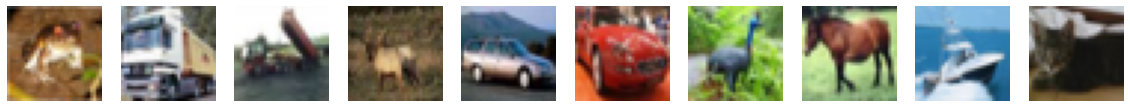

In [57]:
# Inpput layer (original image)
show_size = 10
plt.figure(figsize=(20, 20))
for i in range(show_size):
  draw(X_train[i], 1, show_size, i+1)
plt.show()

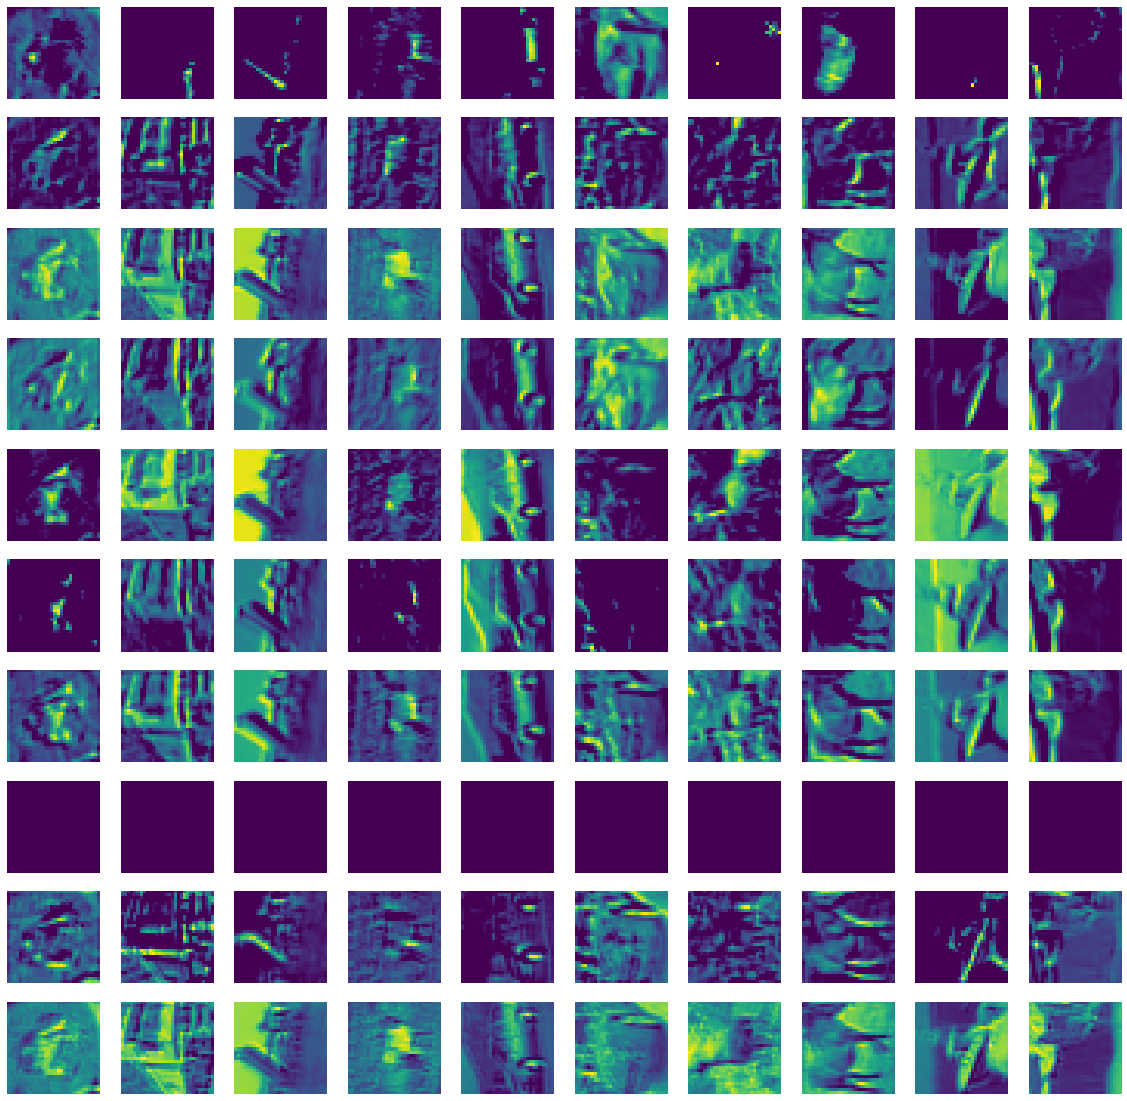

In [60]:
# first layer
get_first_layer_output = K.function([model.layers[0].input],
                                    [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20, 20))

for img_index, filters in enumerate(first_layer, start=1):
  filters_re = filters.transpose(2, 1, 0)
  for filter_index, mat in enumerate(filters_re):
    pos = (filter_index) * show_size + img_index

    draw(mat, nb_filters, show_size, pos)
plt.show()

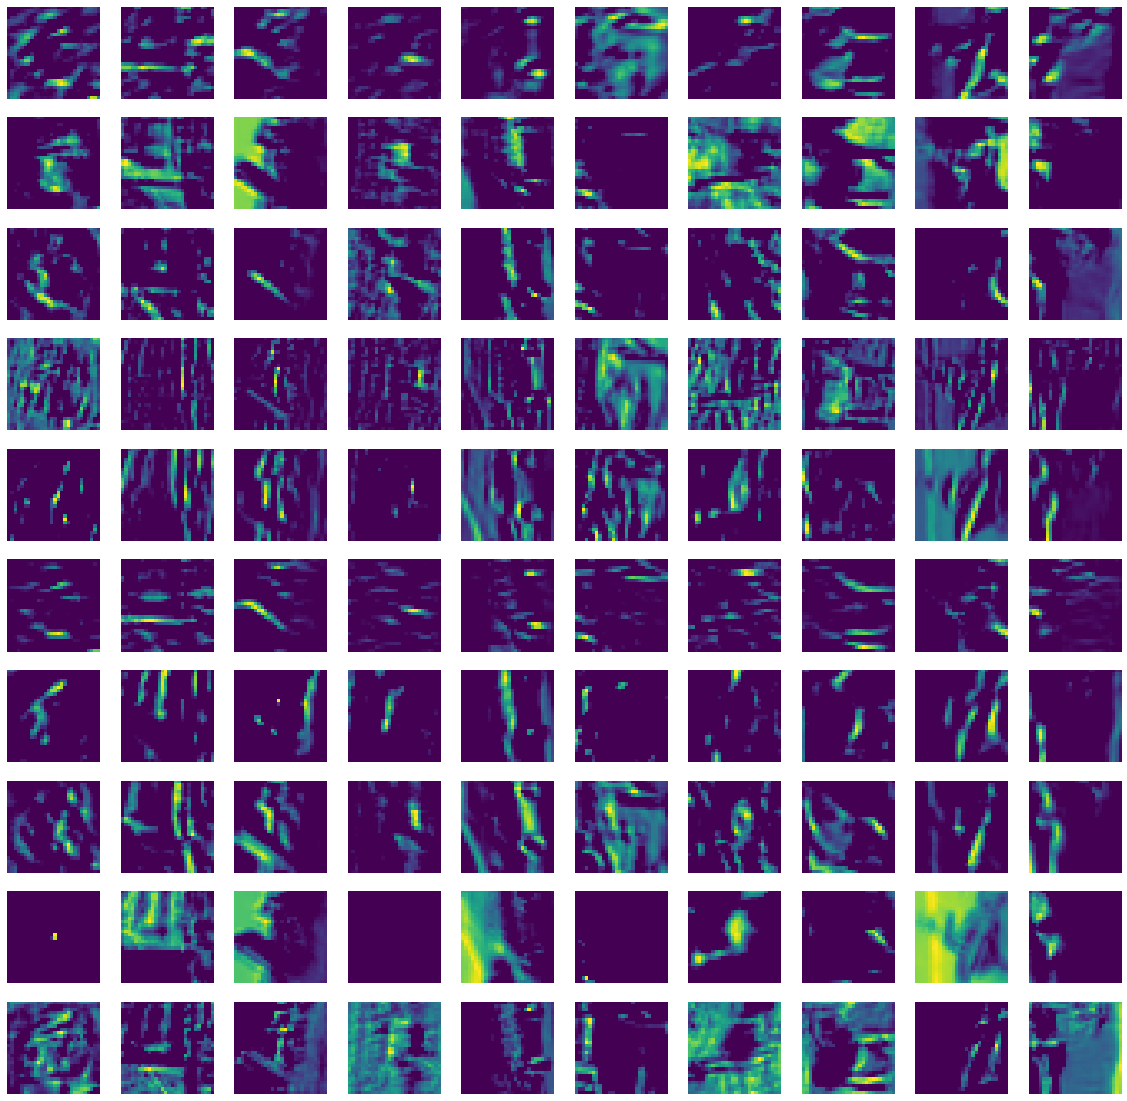

In [61]:
# second layer
get_second_layer_output = K.function([model.layers[0].input],
                          [model.layers[3].output])
second_layers = get_second_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(second_layers, start=1):
    filters_re = filters.transpose(2,1,0)
    for filter_index, mat in enumerate(filters_re):
        pos = (filter_index)*show_size+img_index
        draw(mat, nb_filters, show_size, pos)
plt.show()

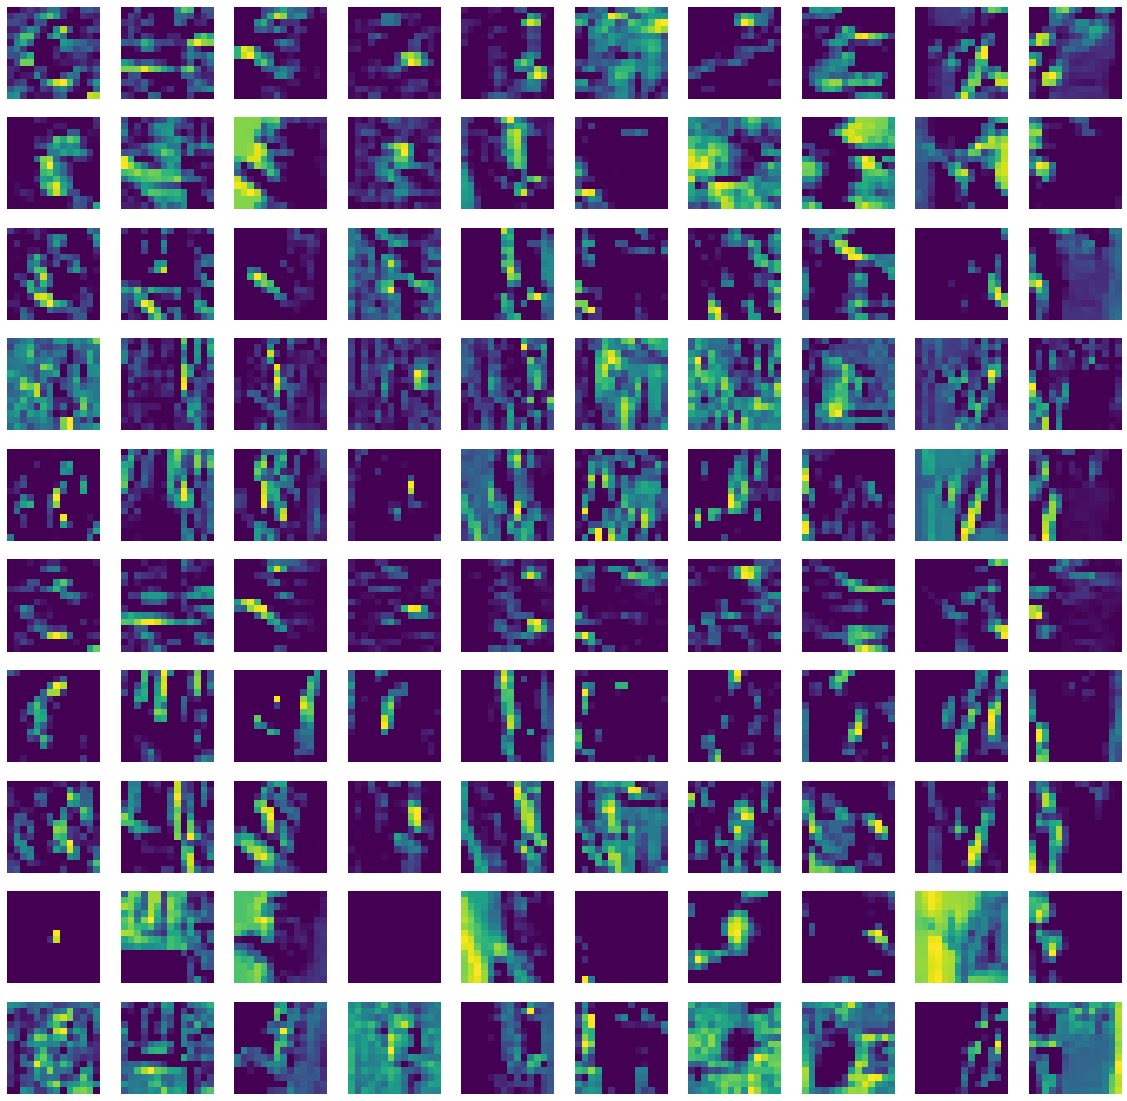

In [62]:
# third Layer
get_third_layer_output = K.function([model.layers[0].input],
                          [model.layers[4].output])
third_layers = get_third_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))

for img_index, filters in enumerate(third_layers, start=1):
    filters_re = filters.transpose(2,1,0)
    for filter_index, mat in enumerate(filters_re):
        pos = (filter_index)*show_size+img_index
        mat_size = mat.shape[1]
        draw(mat, nb_filters, show_size, pos)
plt.show()

## CNN on MNIST Dataset

In [3]:
img_rows, img_cols = 28, 28
nb_classes = 10

nb_filters = 5 # the number of filters
nb_pool = 2 # window size of pooling
nb_conv = 3 # window or kernel size of filter
nb_epoch = 5

input_shape = (img_rows, img_cols, 1)
    
# data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1) 
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

11501568/11490434 [==============================] - 0s 0us/step
X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [4]:
# define two groups of layers: feature (convolutions) and classification (dense)
feature_layers = [
    Convolution2D(nb_filters, nb_conv, input_shape=input_shape),
    Activation('relu'),
    Convolution2D(nb_filters, nb_conv),
    Activation('relu'),
    MaxPooling2D(pool_size=(nb_pool, nb_pool)),
    Dropout(0.25),
    Flatten(),
]
classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(nb_classes),
    Activation('softmax')
]

# create complete model
model = Sequential(feature_layers + classification_layers)

In [5]:
model.compile(loss='categorical_crossentropy', optimizer="adadelta", metrics=['accuracy'])

In [6]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 5)         50        
_________________________________________________________________
activation (Activation)      (None, 26, 26, 5)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 5)         230       
_________________________________________________________________
activation_1 (Activation)    (None, 24, 24, 5)         0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 5)         0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 5)         0         
_________________________________________________________________
flatten (Flatten)            (None, 720)               0

In [7]:
model.fit(X_train, Y_train, epochs=5, batch_size=256, verbose=2,  
          validation_split=0.2)

Epoch 1/5
188/188 - 44s - loss: 2.3845 - accuracy: 0.0836 - val_loss: 2.3404 - val_accuracy: 0.0929
Epoch 2/5
188/188 - 1s - loss: 2.3695 - accuracy: 0.0862 - val_loss: 2.3274 - val_accuracy: 0.0932
Epoch 3/5
188/188 - 1s - loss: 2.3580 - accuracy: 0.0884 - val_loss: 2.3151 - val_accuracy: 0.0938
Epoch 4/5
188/188 - 1s - loss: 2.3462 - accuracy: 0.0878 - val_loss: 2.3033 - val_accuracy: 0.0957
Epoch 5/5
188/188 - 1s - loss: 2.3328 - accuracy: 0.0924 - val_loss: 2.2921 - val_accuracy: 0.0973


## Visualization of Layers

In [8]:
# visualization
def draw(data, row, col, n):
    plt.subplot(row, col, n)    
    plt.imshow(data, cmap=plt.cm.gray_r)
    plt.axis('off')

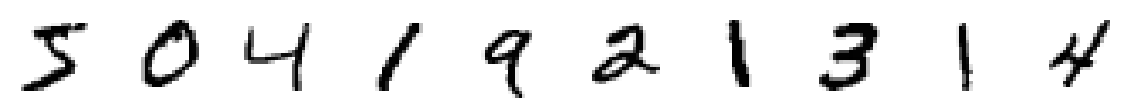

In [9]:
show_size = 10
plt.figure(figsize=(20,20))

for i in range(show_size):
    draw(X_train[i].reshape(28,28), 1, show_size, i+1)
plt.show()

first layer shape:  (10, 26, 26, 5)


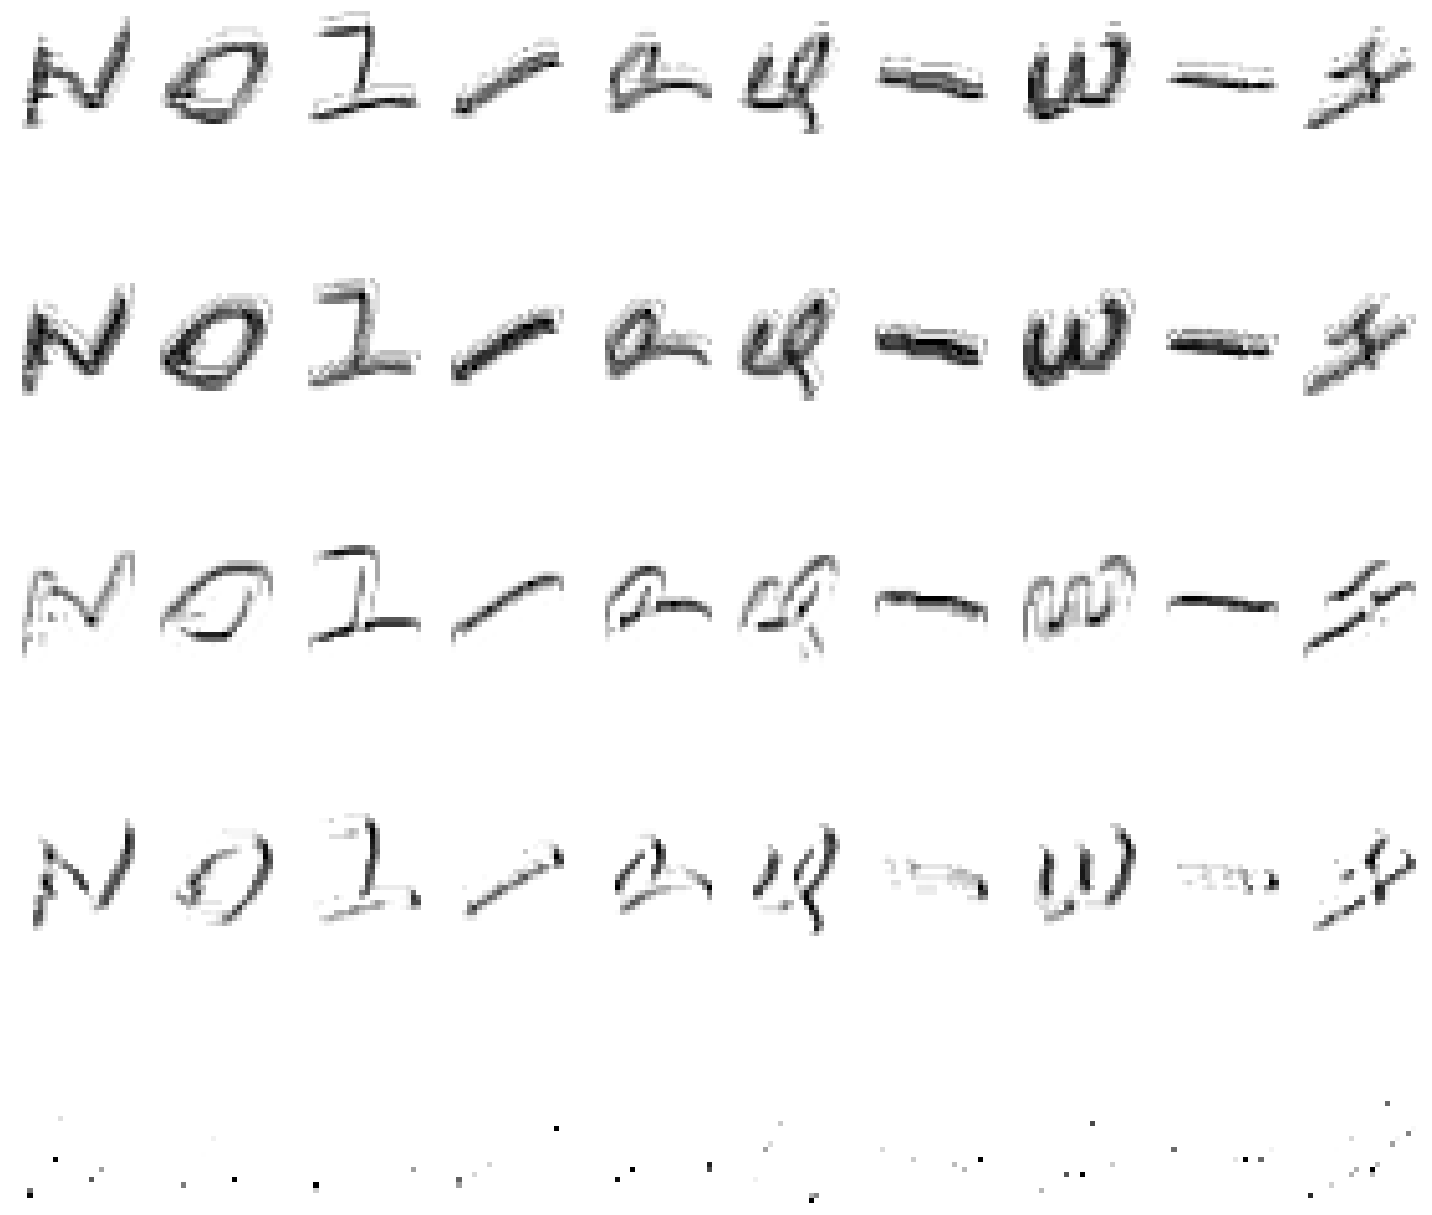

In [10]:
get_first_layer_output = K.function([model.layers[0].input], [model.layers[1].output])
first_layer = get_first_layer_output([X_train[0:show_size]])[0]

plt.figure(figsize=(20,20))
print('first layer shape: ', first_layer.shape)

for img_index, filters in enumerate(first_layer, start=1):
    filters_re = filters.transpose(2,1,0)
    for filter_index, mat in enumerate(filters_re):
        pos = (filter_index)*10+img_index
        draw(mat, nb_filters, show_size, pos)
plt.tight_layout()        
plt.show()